In [1]:
## SETUP ENVIRONMENT ##
#Import Packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
import time

#Traditional Classification Methods
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
#SVM
from sklearn import svm
#RandomForest
from sklearn.ensemble import RandomForestClassifier 

#Machine Learning Classification Methods

#Multilayer Perceptron
from sklearn.neural_network import MLPClassifier
#Tensorflow + Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras import utils
from keras.callbacks import LearningRateScheduler

In [2]:
#IMPORT THE FASHION MNIST DATASET FROM TENSORFLOW
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#Helper Function for calculating training and testing times
def timer_start():
  global start
  start = time.time()
def timer_end(x):
  labels = {1: "Training", 2: "Testing"}
  end = time.time()
  print(labels[x] + " Time: " + str(round(end - start, 2)) + " sec")

In [4]:
#SCRUB (FLATTEN DATA)
norm_constant = 255.0
train_flat = train_images.reshape((train_images.shape[0], -1)) / norm_constant
test_flat = test_images.reshape((test_images.shape[0], -1)) / norm_constant
train_images = train_images / norm_constant
test_images = test_images / norm_constant
print(train_flat.shape)

(60000, 784)


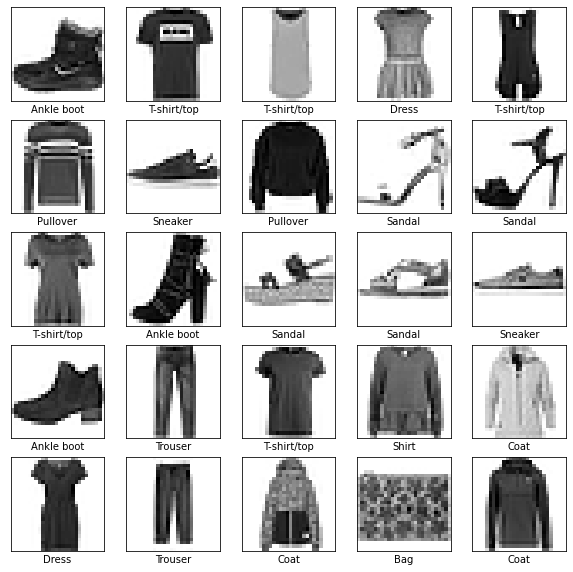

In [5]:
# EXPLORE- VISUALIZE DIFFERENT VARIATIONS FOR FIRST 25 ITEMS
# Labels
fashion_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

fashion_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_labels[train_labels[i]])
plt.show()

In [6]:
(Counter(train_labels), Counter(test_labels))

(Counter({0: 6000,
          1: 6000,
          2: 6000,
          3: 6000,
          4: 6000,
          5: 6000,
          6: 6000,
          7: 6000,
          8: 6000,
          9: 6000}),
 Counter({0: 1000,
          1: 1000,
          2: 1000,
          3: 1000,
          4: 1000,
          5: 1000,
          6: 1000,
          7: 1000,
          8: 1000,
          9: 1000}))

Training Time: 0.69 sec
Testing Time: 0.42 sec
Score: 0.5856
Results Matrix:


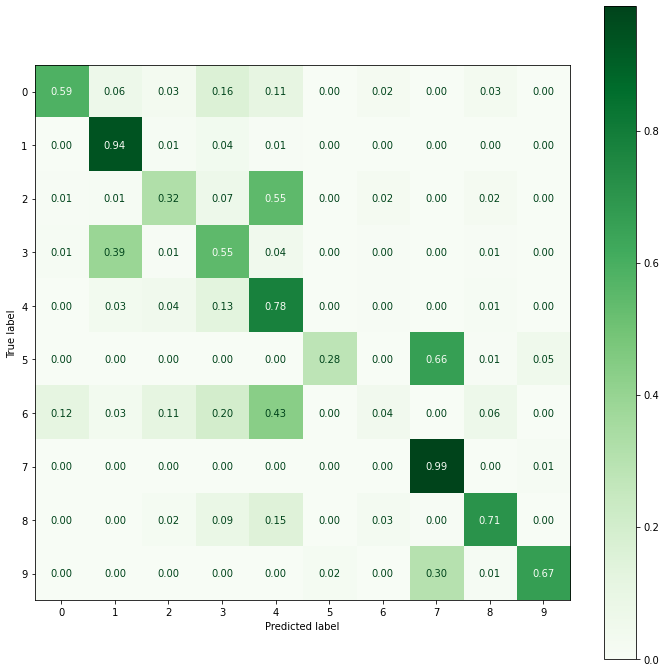

In [7]:
#Method 1: Naive Bayes
# MODEL

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
timer_start()
model = gnb.fit(train_flat, train_labels)
timer_end(1)

# Make predictions
timer_start()
nb_pred = gnb.predict(test_flat)
timer_end(2)

# Evaluate accuracy
print("Score:", accuracy_score(test_labels, nb_pred))
print("Results Matrix:")
expected = test_labels
fig, ax = plt.subplots(figsize=(12, 12))
sklearn.metrics.plot_confusion_matrix(gnb, test_flat, test_labels, normalize = 'true'
                                      , cmap = plt.cm.Greens, ax = ax, values_format = '.2f')
plt.show()

In [38]:
# Method 2: K-Nearest Neighbors
# using 60000 samples is too computationally intensive 
# Downsample to save computation time
train_samples = 600
train_small, test_small, train_small_labels, test_small_labels = train_test_split(train_flat, train_labels, train_size=train_samples, test_size=10000)

In [39]:
# MODEL
#"Training" KNN
timer_start()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_flat, train_labels)
timer_end(1)

#"Testing" KNN
timer_start()
#knn_score = neigh.score(train_flat, train_labels)
timer_end(2)
print("Score:", knn_score)


Training Time: 11.36 sec
Testing Time: 5005.57 sec
Score: 0.9199333333333334


Training Time: 84.17 sec
Test Accuracy:  0.8767
Testing Time: 0.78 sec
Results Matrix:


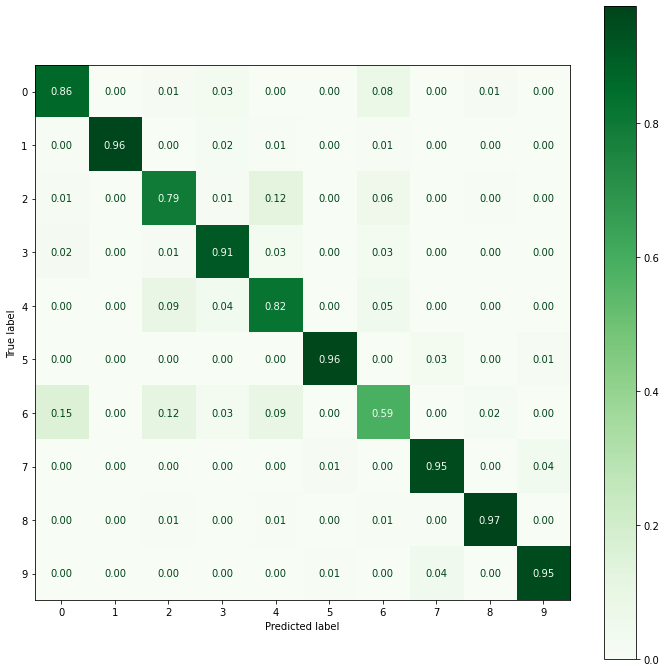

In [40]:
# Method 3: Random Forest
# Training the RF Model
timer_start()
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(train_flat, train_labels)
timer_end(1)

# Testing the RF Model
timer_start()
print('Test Accuracy: ', forest.score(test_flat, test_labels))
rf_pred = forest.predict(test_flat)
timer_end(2)
print("Results Matrix:")
#print(sklearn.metrics.confusion_matrix(expected, rf_pred))
expected = test_labels
fig, ax = plt.subplots(figsize=(12, 12))
sklearn.metrics.plot_confusion_matrix(forest, test_flat, test_labels, normalize = 'true'
                                      , cmap = plt.cm.Greens, ax = ax, values_format = '.2f')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Time: 229.62 sec
Test Accuracy:  0.8387
Testing Time: 0.06 sec
Results Matrix:


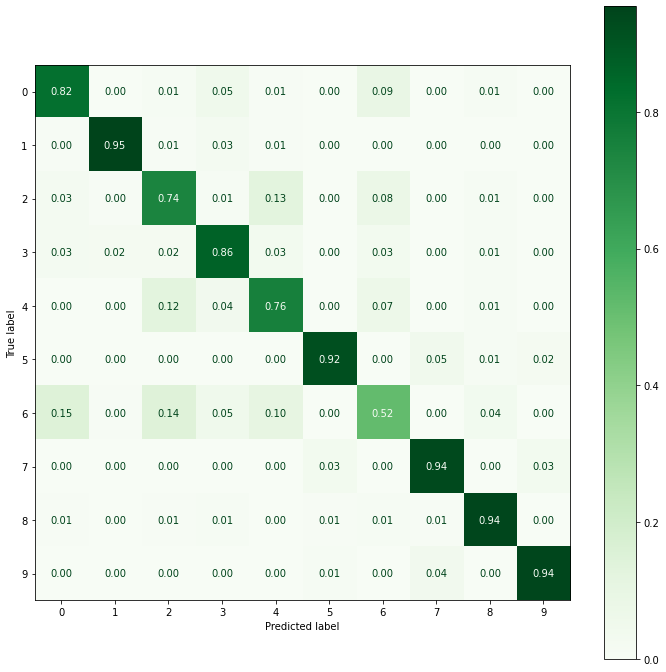

In [8]:
# Method 4: SVM
#Training the SVM
timer_start()
svm_model = svm.LinearSVC()
svm_model.fit(train_flat, train_labels)
timer_end(1)

#Testing the SVM
timer_start()
print('Test Accuracy: ', svm_model.score(test_flat, test_labels))
svm_pred = svm_model.predict(test_flat)
timer_end(2)
print("Results Matrix:")
#print(sklearn.metrics.confusion_matrix(expected, svm_pred))
expected = test_labels
fig, ax = plt.subplots(figsize=(12, 12))
sklearn.metrics.plot_confusion_matrix(svm_model, test_flat, test_labels, normalize = 'true'
                                      , cmap = plt.cm.Greens, ax = ax, values_format = '.2f')
plt.show()

In [25]:
# Machine Learning Methods:
# Method 5: Multi-Layer Perceptron

# MODEL
# Build basic model using MLP Classifier
# Additional configurations available:  https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

timer_start()
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4, solver="adam",
                    verbose = 10, tol=1e-4, random_state=1, learning_rate_init=.01, learning_rate = 'adaptive')
mlp.fit(train_flat, train_labels)
timer_end(1)
print("Training set score: {0}".format(mlp.score(train_flat, train_labels)))  

Iteration 1, loss = 0.53036978
Iteration 2, loss = 0.38043104
Iteration 3, loss = 0.36174541
Iteration 4, loss = 0.34401587
Iteration 5, loss = 0.31813098
Iteration 6, loss = 0.31318716
Iteration 7, loss = 0.30632178
Iteration 8, loss = 0.29500251
Iteration 9, loss = 0.29207356
Iteration 10, loss = 0.28893674
Iteration 11, loss = 0.27876297
Iteration 12, loss = 0.27955417
Iteration 13, loss = 0.27359080
Iteration 14, loss = 0.27232507
Iteration 15, loss = 0.26323786
Iteration 16, loss = 0.26255697
Iteration 17, loss = 0.25859609
Iteration 18, loss = 0.25746207
Iteration 19, loss = 0.26129492
Iteration 20, loss = 0.25543966
Iteration 21, loss = 0.24630603
Iteration 22, loss = 0.24835969
Iteration 23, loss = 0.23949046
Iteration 24, loss = 0.24523121
Iteration 25, loss = 0.24293661
Iteration 26, loss = 0.23915593
Iteration 27, loss = 0.23833968
Iteration 28, loss = 0.23463404
Iteration 29, loss = 0.23638362
Iteration 30, loss = 0.23998319
Iteration 31, loss = 0.23492651
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.94435


Test set score: 0.8724
Testing Time: 3.93 sec
Results Matrix:


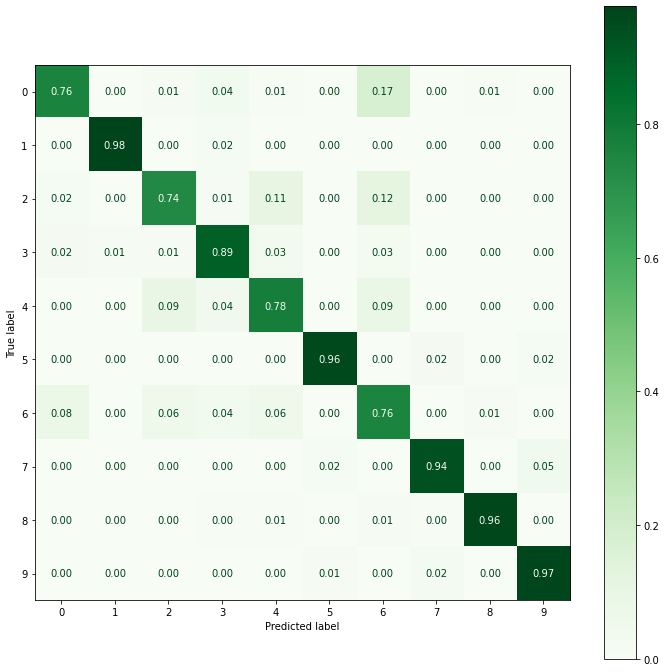

In [26]:
# Test performance of MLP
timer_start()
print("Test set score: {0}".format(mlp.score(test_flat, test_labels)))
mlp_pred = mlp.predict(test_flat)
timer_end(2)
print("Results Matrix:")
#print(sklearn.metrics.confusion_matrix(expected, mlp_pred))
fig, ax = plt.subplots(figsize=(12, 12))
sklearn.metrics.plot_confusion_matrix(mlp, test_flat, test_labels, normalize = 'true'
                                      , cmap = plt.cm.Greens, ax = ax, values_format = '.2f')
plt.show()

In [10]:
# Method 6: Tensorflow with Keras
# SCRUB DATA
train_labels_array = utils.to_categorical(train_labels)
test_labels_array = utils.to_categorical(test_labels)
num_classes = test_labels_array.shape[1]
num_pixels = train_flat.shape[1]

# MODEL - BUILD THE BASELINE

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

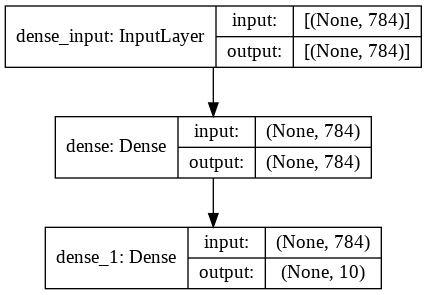

In [32]:
tf.keras.backend.clear_session()
model = baseline_model()
keras.utils.plot_model(model, show_shapes=True)

In [12]:
# MODEL - FIT THE BASELINE KERAS MODEL
timer_start()
model = baseline_model()
history = model.fit(train_flat, train_labels_array, validation_data=(test_flat, test_labels_array), epochs=100, batch_size=200, verbose=2)
timer_end(1)

# MODEL - RESULTS
timer_start()
score = model.evaluate(test_flat, test_labels_array, verbose=0)
timer_end(2)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.4f}".format(score[1]))

Epoch 1/100
300/300 - 4s - loss: 0.5127 - accuracy: 0.8192 - val_loss: 0.4484 - val_accuracy: 0.8395
Epoch 2/100
300/300 - 1s - loss: 0.3725 - accuracy: 0.8672 - val_loss: 0.3892 - val_accuracy: 0.8623
Epoch 3/100
300/300 - 1s - loss: 0.3321 - accuracy: 0.8805 - val_loss: 0.3613 - val_accuracy: 0.8685
Epoch 4/100
300/300 - 1s - loss: 0.3039 - accuracy: 0.8903 - val_loss: 0.3713 - val_accuracy: 0.8665
Epoch 5/100
300/300 - 1s - loss: 0.2856 - accuracy: 0.8952 - val_loss: 0.3400 - val_accuracy: 0.8777
Epoch 6/100
300/300 - 1s - loss: 0.2694 - accuracy: 0.9008 - val_loss: 0.3430 - val_accuracy: 0.8776
Epoch 7/100
300/300 - 1s - loss: 0.2564 - accuracy: 0.9056 - val_loss: 0.3285 - val_accuracy: 0.8800
Epoch 8/100
300/300 - 1s - loss: 0.2453 - accuracy: 0.9099 - val_loss: 0.3209 - val_accuracy: 0.8868
Epoch 9/100
300/300 - 1s - loss: 0.2346 - accuracy: 0.9134 - val_loss: 0.3255 - val_accuracy: 0.8867
Epoch 10/100
300/300 - 1s - loss: 0.2208 - accuracy: 0.9186 - val_loss: 0.3227 - val_accura

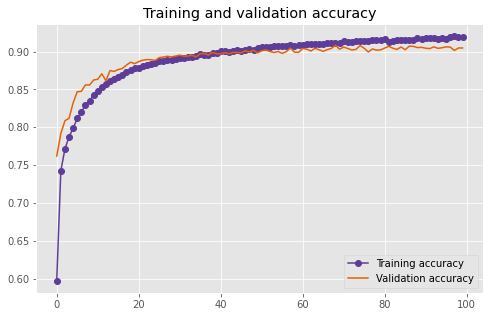

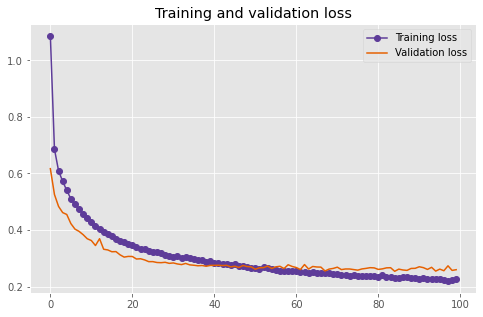

In [14]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

In [27]:
# MODEL - ADD DROPOUT LAYER

def dropout_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    # DROPOUT LAYER - SHOULD REDUCE OVERFITTING
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # COMPILE MODEL
    # OPTIMIZER - SGD
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [45]:
# RUN UPDATED MODEL WITH DROPOUT LAYER
timer_start()
model = dropout_model()
history = model.fit(train_flat, train_labels_array, validation_data=(test_flat, test_labels_array), 
                    epochs=100, batch_size=200, verbose=1)
timer_end(1)

# DROPOUT MODEL - RESULTS
timer_start()
score = model.evaluate(test_flat, test_labels_array, verbose=0)
timer_end(2)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.4f}".format(score[1]))

Epoch 1/100
300/300 [==============================] - 1s 3ms/step - loss: 1.5983 - accuracy: 0.4461 - val_loss: 0.8161 - val_accuracy: 0.7311
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8385 - accuracy: 0.7162 - val_loss: 0.6958 - val_accuracy: 0.7683
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7175 - accuracy: 0.7612 - val_loss: 0.6382 - val_accuracy: 0.7860
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6629 - accuracy: 0.7760 - val_loss: 0.6029 - val_accuracy: 0.7996
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6390 - accuracy: 0.7854 - val_loss: 0.5772 - val_accuracy: 0.8073
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5982 - accuracy: 0.7986 - val_loss: 0.5581 - val_accuracy: 0.8129
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5849 - accuracy: 0.8041 - val_loss: 0.5449 - val_accuracy: 0.8146

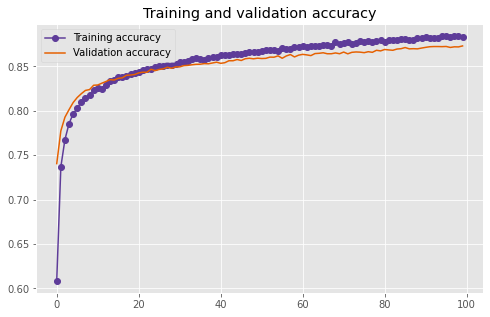

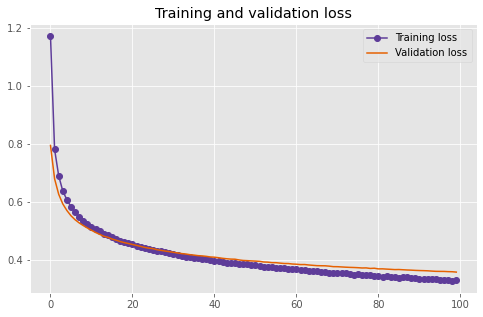

In [18]:
# INTERPRET
plot_train_curve(history)

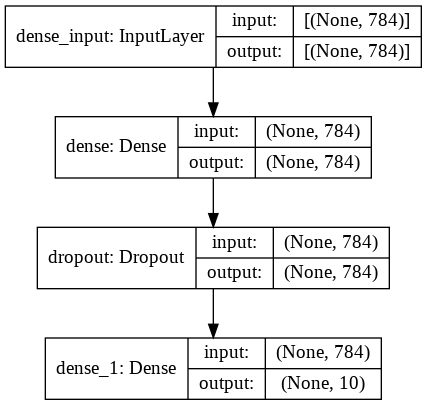

In [31]:
tf.keras.backend.clear_session()
model = dropout_model()
keras.utils.plot_model(model, show_shapes=True)

In [12]:
# Method 7: Convolutional Neural Network via Tensorflow and Keras

# SCRUB
# SET HYPER-PARAMETERS
num_classes = 10
input_shape = (28, 28, 1)
train_images_conv = np.expand_dims(train_images, -1)
test_images_conv = np.expand_dims(test_images, -1)

print('train_images_conv shape:', train_images_conv.shape)

train_images_conv shape: (60000, 28, 28, 1)


In [35]:
# MODEL - BUILD THE COMPLEX

def complex_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))                                   # input layer - in this case the basic 28 x 28
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))         # first convolution layer - creates new feature map - builds up 
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))                            # pooling layer to slim down the number of features
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))                                              # help prevent overfitting  
    model.add(layers.Dense(num_classes, activation="softmax"))
    #COMPILE MODEL
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [21]:
# MODEL - FIT THE COMPLEX MODEL

# ADDIIONAL HYPERPARAMETERS
batch_size = 200
epochs = 50

timer_start()
model = complex_model()
history = model.fit(train_images_conv, train_labels_array, batch_size=batch_size, epochs=epochs, validation_split=0.1)
timer_end(1)

# MODEL - RESULTS
timer_start()
score = model.evaluate(test_images_conv, test_labels_array, verbose=0)
timer_end(2)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.4f}".format(score[1]))

Epoch 1/50
270/270 [==============================] - 32s 7ms/step - loss: 1.1284 - accuracy: 0.6143 - val_loss: 0.4690 - val_accuracy: 0.8258
Epoch 2/50
270/270 [==============================] - 2s 6ms/step - loss: 0.4860 - accuracy: 0.8232 - val_loss: 0.3955 - val_accuracy: 0.8597
Epoch 3/50
270/270 [==============================] - 2s 6ms/step - loss: 0.4345 - accuracy: 0.8458 - val_loss: 0.3697 - val_accuracy: 0.8647
Epoch 4/50
270/270 [==============================] - 2s 6ms/step - loss: 0.3973 - accuracy: 0.8564 - val_loss: 0.3527 - val_accuracy: 0.8733
Epoch 5/50
270/270 [==============================] - 2s 6ms/step - loss: 0.3715 - accuracy: 0.8674 - val_loss: 0.3361 - val_accuracy: 0.8800
Epoch 6/50
270/270 [==============================] - 2s 6ms/step - loss: 0.3531 - accuracy: 0.8724 - val_loss: 0.3274 - val_accuracy: 0.8803
Epoch 7/50
270/270 [==============================] - 2s 6ms/step - loss: 0.3383 - accuracy: 0.8780 - val_loss: 0.3195 - val_accuracy: 0.8813
Epoch

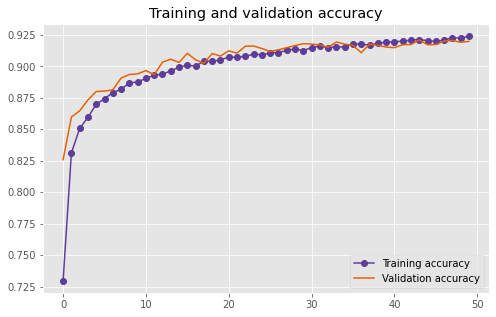

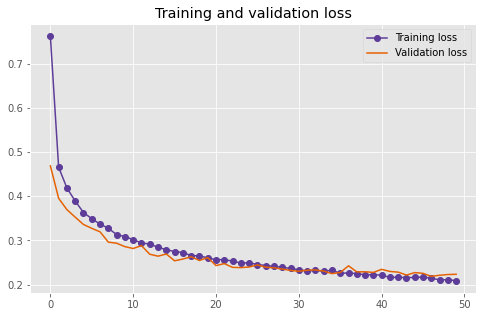

In [22]:
plot_train_curve(history)

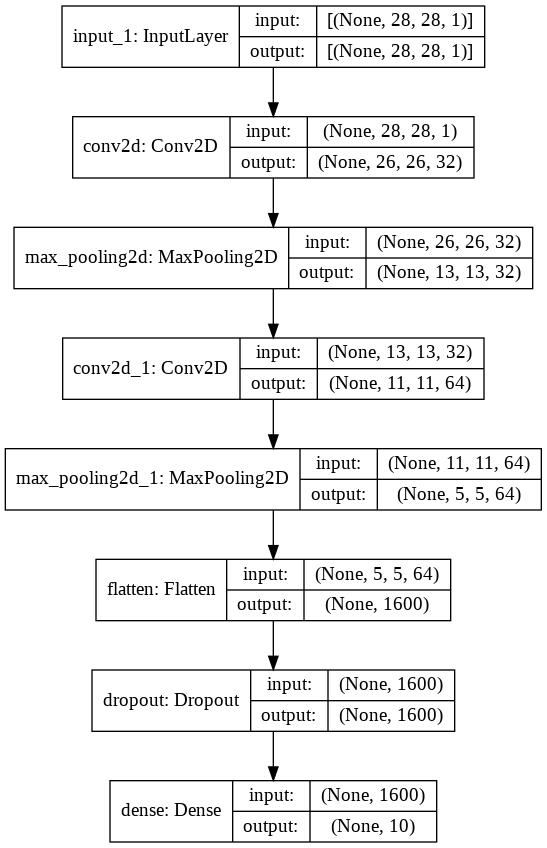

In [38]:
# VISUALIZE THE MODEL
tf.keras.backend.clear_session()
model = complex_model()
keras.utils.plot_model(model, show_shapes=True)
#model.summary()

In [18]:
# MODEL - Emulate the LeNet-5 model 

def lenet_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))                                   
    #Layer C1 is a convolution layer with six convolution kernels of 5x5 and the size of feature mapping is 28x28
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation="relu"))         
    #Layer S2 is the subsampling/pooling layer that outputs 6 feature graphs of size 14x14.
    model.add(layers.AveragePooling2D())
    #Layer C3 is a convolution layer with 16 5-5 convolution kernels                         
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation="relu"))
    #Layer S4 is similar to S2, with size of 2x2 and output of 16 5x5 feature graphs
    model.add(layers.AveragePooling2D())
    #Layer C5 is a convolution layer with 120 convolution kernels of size 5x5.
    model.add(layers.Flatten())                                      
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    #model.add(layers.Dropout(0.5)) 
    model.add(Dense(num_classes, activation='softmax'))
    #COMPILE MODEL
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [52]:
# MODEL - FIT THE LENET MODEL

# ADDIIONAL HYPERPARAMETERS
batch_size = 200
epochs = 50

timer_start()
model = lenet_model()
history = model.fit(train_images_conv, train_labels_array, batch_size=batch_size, epochs=epochs, validation_split=0.1)
timer_end(1)

# LENET MODEL - RESULTS
timer_start()
score = model.evaluate(test_images_conv, test_labels_array, verbose=0)
timer_end(2)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.4f}".format(score[1]))

Epoch 1/50
270/270 [==============================] - 2s 5ms/step - loss: 1.1698 - accuracy: 0.5880 - val_loss: 0.5616 - val_accuracy: 0.7823
Epoch 2/50
270/270 [==============================] - 1s 4ms/step - loss: 0.5501 - accuracy: 0.7910 - val_loss: 0.4950 - val_accuracy: 0.8142
Epoch 3/50
270/270 [==============================] - 1s 4ms/step - loss: 0.4812 - accuracy: 0.8239 - val_loss: 0.4481 - val_accuracy: 0.8338
Epoch 4/50
270/270 [==============================] - 1s 4ms/step - loss: 0.4426 - accuracy: 0.8398 - val_loss: 0.4382 - val_accuracy: 0.8417
Epoch 5/50
270/270 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.8514 - val_loss: 0.4061 - val_accuracy: 0.8510
Epoch 6/50
270/270 [==============================] - 1s 4ms/step - loss: 0.3791 - accuracy: 0.8592 - val_loss: 0.3954 - val_accuracy: 0.8538
Epoch 7/50
270/270 [==============================] - 1s 4ms/step - loss: 0.3670 - accuracy: 0.8639 - val_loss: 0.3816 - val_accuracy: 0.8645
Epoch 

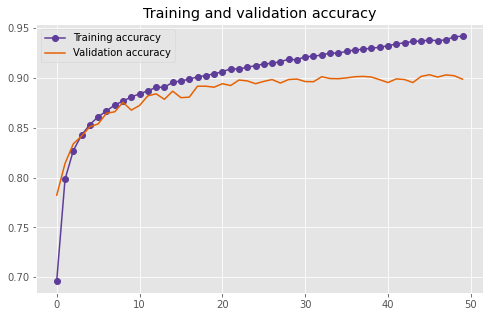

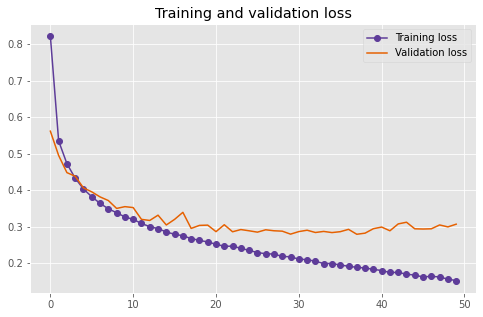

In [53]:
plot_train_curve(history)

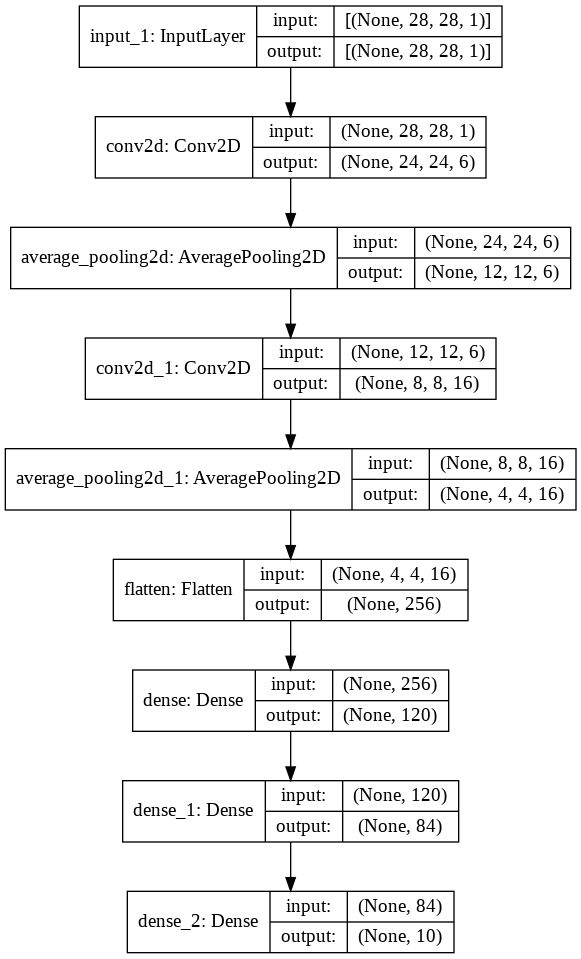

In [19]:
# VISUALIZE THE MODEL
tf.keras.backend.clear_session()
model = lenet_model()
keras.utils.plot_model(model, show_shapes=True)
#model.summary()

In [7]:
# MODEL - Emulate the LeNet-5 model w/ Dropout Layer

def lenetdropout_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))                                   
    #Layer C1 is a convolution layer with six convolution kernels of 5x5 and the size of feature mapping is 28x28
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation="relu"))         
    #Layer S2 is the subsampling/pooling layer that outputs 6 feature graphs of size 14x14.
    model.add(layers.AveragePooling2D())
    #Layer C3 is a convolution layer with 16 5-5 convolution kernels                         
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation="relu"))
    #Layer S4 is similar to S2, with size of 2x2 and output of 16 5x5 feature graphs
    model.add(layers.AveragePooling2D())
    #Layer C5 is a convolution layer with 120 convolution kernels of size 5x5.
    model.add(layers.Flatten())                                      
    model.add(Dense(120, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(Dense(84, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    #COMPILE MODEL
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [12]:
# MODEL - FIT THE LENET+DROPOUT MODEL

# ADDIIONAL HYPERPARAMETERS
batch_size = 200
epochs = 100

timer_start()
model = lenetdropout_model()
history = model.fit(train_images_conv, train_labels_array, batch_size=batch_size, epochs=epochs, validation_split=0.1)
timer_end(1)

# LENET MODEL - RESULTS
timer_start()
score = model.evaluate(test_images_conv, test_labels_array, verbose=0)
timer_end(2)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.4f}".format(score[1]))

Epoch 1/100
270/270 [==============================] - 34s 4ms/step - loss: 1.4740 - accuracy: 0.4564 - val_loss: 0.6171 - val_accuracy: 0.7620
Epoch 2/100
270/270 [==============================] - 1s 3ms/step - loss: 0.7102 - accuracy: 0.7331 - val_loss: 0.5257 - val_accuracy: 0.7917
Epoch 3/100
270/270 [==============================] - 1s 3ms/step - loss: 0.6283 - accuracy: 0.7637 - val_loss: 0.4836 - val_accuracy: 0.8087
Epoch 4/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5833 - accuracy: 0.7836 - val_loss: 0.4618 - val_accuracy: 0.8118
Epoch 5/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5427 - accuracy: 0.7959 - val_loss: 0.4552 - val_accuracy: 0.8323
Epoch 6/100
270/270 [==============================] - 1s 3ms/step - loss: 0.5139 - accuracy: 0.8101 - val_loss: 0.4230 - val_accuracy: 0.8470
Epoch 7/100
270/270 [==============================] - 1s 3ms/step - loss: 0.4935 - accuracy: 0.8192 - val_loss: 0.4035 - val_accuracy: 0.847

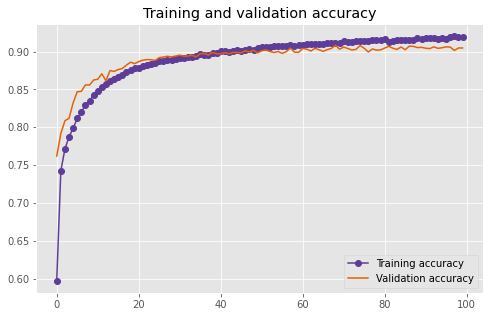

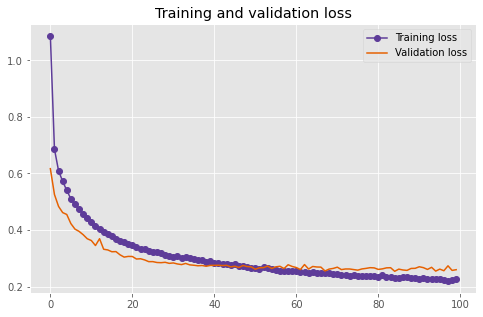

In [15]:
plot_train_curve(history)

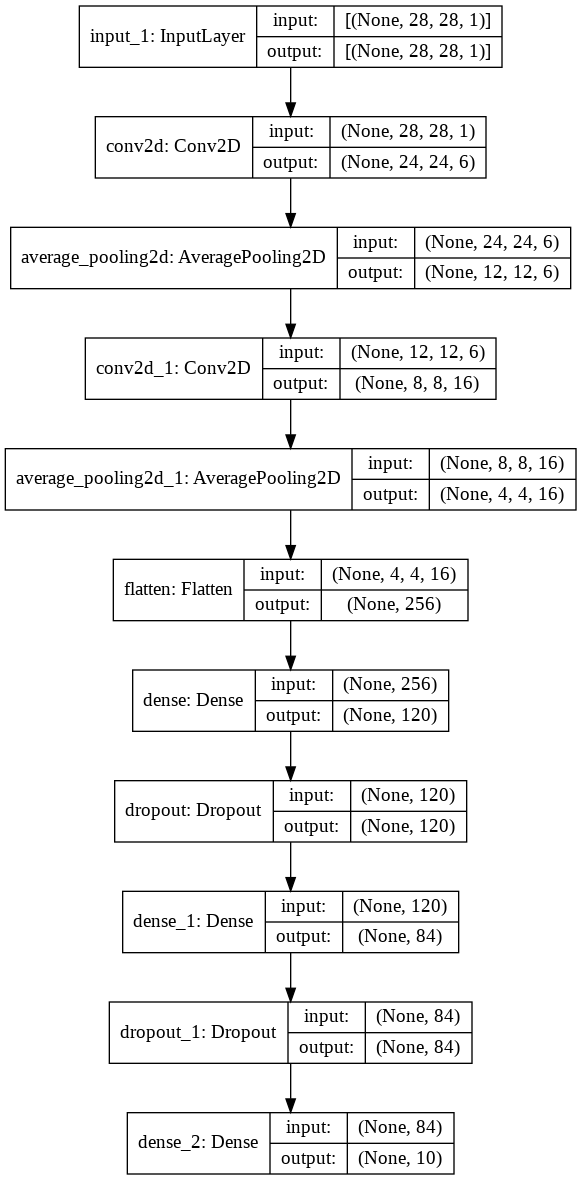

In [20]:
# VISUALIZE THE MODEL
tf.keras.backend.clear_session()
model = lenetdropout_model()
keras.utils.plot_model(model, show_shapes=True)
#model.summary()

In [8]:
# MODEL - Emulate a 19-layer model

def expensive_model():
    model = Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                    data_format='channels_last', input_shape=(28,28,1)))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                    data_format='channels_last'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                    data_format='channels_last'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
        
        
    model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                    data_format='channels_last'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    #COMPILE MODEL
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [13]:
# MODEL - FIT THE DEEP CONVOLUTED MODEL

# ADDIIONAL HYPERPARAMETERS
batch_size = 128
epochs = 40

timer_start()
model = expensive_model()
history = model.fit(train_images_conv, train_labels_array, batch_size=batch_size, epochs=epochs, validation_split=0.1)
timer_end(1)

# MODEL - RESULTS
timer_start()
score = model.evaluate(test_images_conv, test_labels_array, verbose=0)
timer_end(2)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.4f}".format(score[1]))

Epoch 1/40
 17/422 [>.............................] - ETA: 8:07 - loss: 1.9576 - accuracy: 0.4443

KeyboardInterrupt: ignored

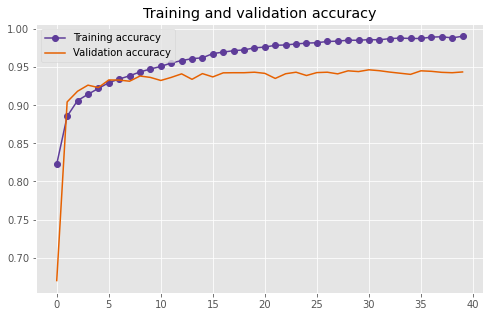

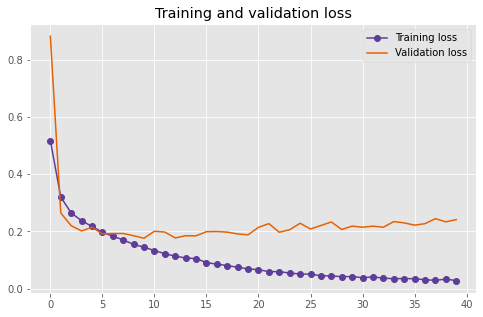

In [30]:
plot_train_curve(history)

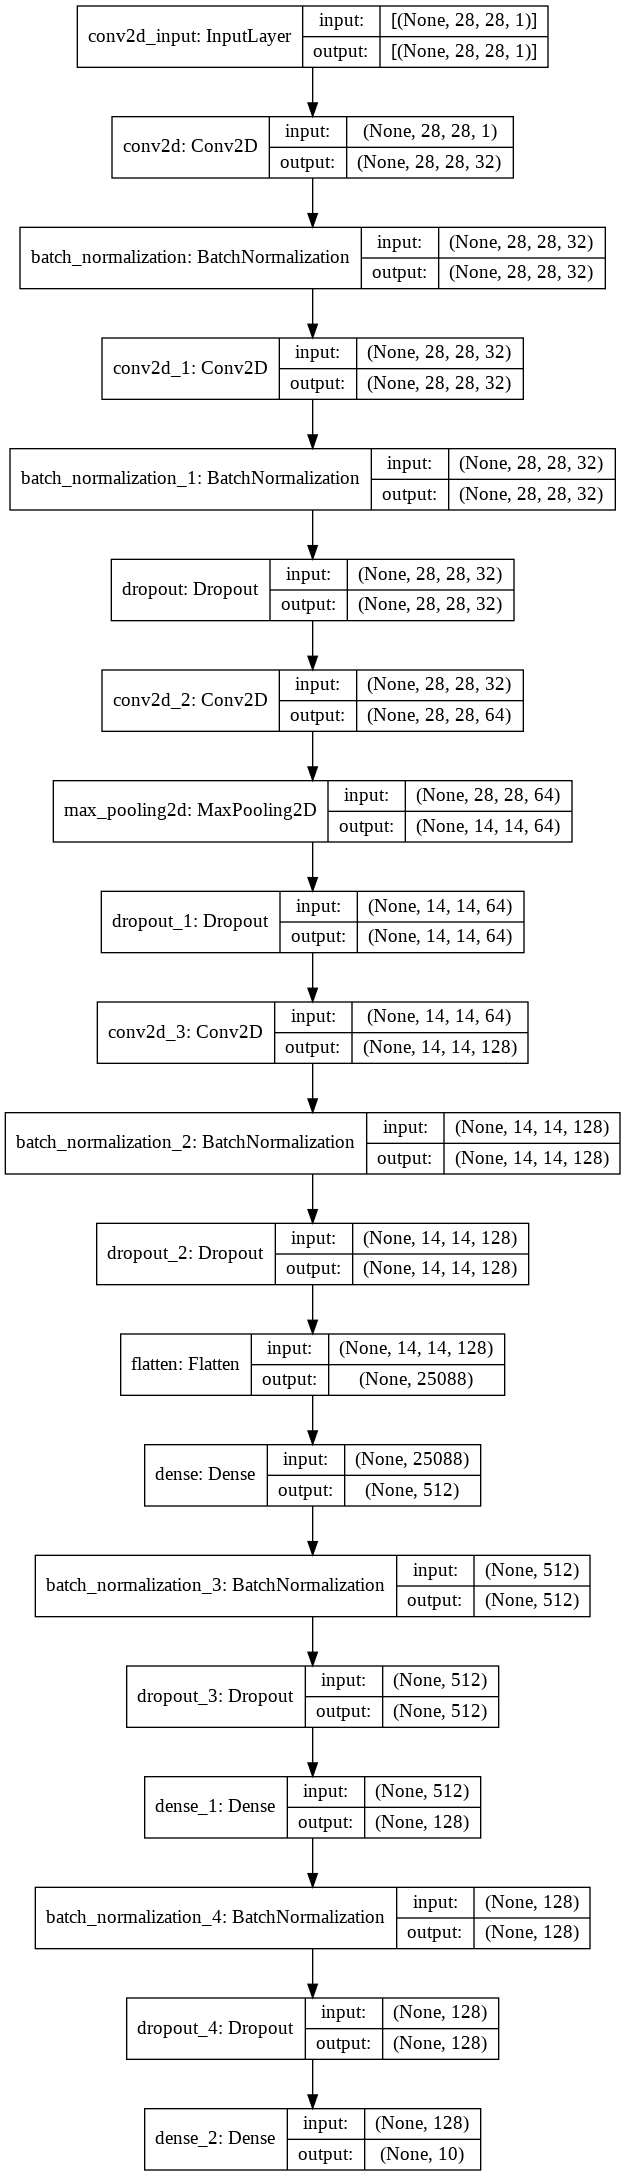

In [22]:
# VISUALIZE THE MODEL
tf.keras.backend.clear_session()
model = expensive_model()
keras.utils.plot_model(model, show_shapes=True)
#model.summary()